In [30]:
import numpy as np
import numpy as np
from tensorflow.keras import optimizers,losses,metrics
from tensorflow.keras.datasets import imdb
from util.functions import vectorize_sequences
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

Because we are restricting pur self to the top 1000 most frequent words
no word index will exceed 10,000


In [31]:
# list max
max([max(sequence) for sequence in train_data])


9999

Decoding reviews


In [32]:
# TODO  convert me into a function

# first three places are useless crap
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [33]:
# vectorise the data
# Encoding the integer sequences into a binary matrix
x_train = vectorize_sequences(train_data,10000)
x_test = vectorize_sequences(test_data,10000)

print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [34]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### The model Definition


In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [36]:
# validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [37]:
# train the model

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5264 - acc: 0.7887 - val_loss: 0.4173 - val_acc: 0.8520
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3255 - acc: 0.8994 - val_loss: 0.3168 - val_acc: 0.8834
Epoch 3/20
30/30 [==============================] 

In [38]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Plotting and training the validation accuracy


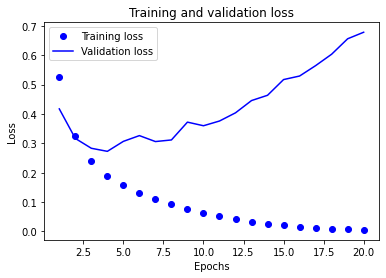

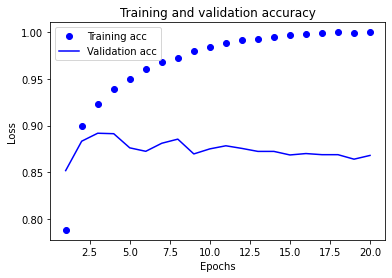

In [39]:
import matplotlib.pyplot as plt
history_dict = history.history

# values
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
#

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 904us/step - loss: 0.7364 - acc: 0.8525

[0.7364251613616943, 0.8525199890136719]

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4660 - accuracy: 0.8232
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2659 - accuracy: 0.9090

[0.2934909462928772, 0.8835600018501282]

In [42]:
import matplotlib.pyplot as plt
history_dict = history.history
history_dict.keys()
7

7

In [43]:
print(x_train[0].shape)

(10000,)
